# Task 0
Import Libraries and Read the Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import scipy.stats as stats

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Evil_Geniuses_Assignment/social_data.xlsx')

In [4]:
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


# Task 1 

-> What is the typical engagement rate we can expect? What’s the likelihood that we can
achieve a 15% engagement rate?

In [5]:
#Calculate (Engagement Rate as Total Engagements/ Total Impressions)*100
df['Engagement Rate'] = (df['Total Engagements'] / df['Total Impressions']) * 100

In [6]:
df['Engagement Rate']

0             NaN
1             NaN
2             NaN
3             NaN
4       12.766628
          ...    
3474          NaN
3475          NaN
3476          NaN
3477     1.984877
3478          NaN
Name: Engagement Rate, Length: 3479, dtype: float64

In [7]:
# Some entries in the dataset have '0' values for Total Engagements and Total Impressions, 
# which caused the Engagement Ratio to become NaN (Not a Number). 
# To ensure consistency and enable further analysis, these NaN values have been replaced with '0'.

df['Engagement Rate'].fillna(0, inplace=True)

In [8]:
# Getting statistical summary of the numerical columns in the DataFrame df
df.describe()

,Total Impressions,Total Engagements,Engagement Rate
count,3479.000000,3479.000000,3479.000000
mean,10972.453579,947.390629,31.833090
std,29577.108063,3468.628038,1593.821839
min,0.000000,0.000000,0.000000
25%,167.000000,0.000000,0.000000
50%,1884.000000,39.000000,2.041949
75%,12467.000000,276.500000,5.004670
max,753227.000000,95062.000000,94000.000000



* We can see that there are some unusually high maximum values in the dataset, indicating the presence of potential outliers. These outliers can have a significant impact on the analysis results and may skew the interpretation of the data. 

* Therefore, it is important to consider these outliers when conducting further analysis and take appropriate measures to handle them

* One thing we can do is use Median instead of Mean as our statistic 
measure.

* Another thing we can do is detect and remove those outliers, we will be using the Interquartile Range (IQR) method to deal with these outliers.

<Axes: >

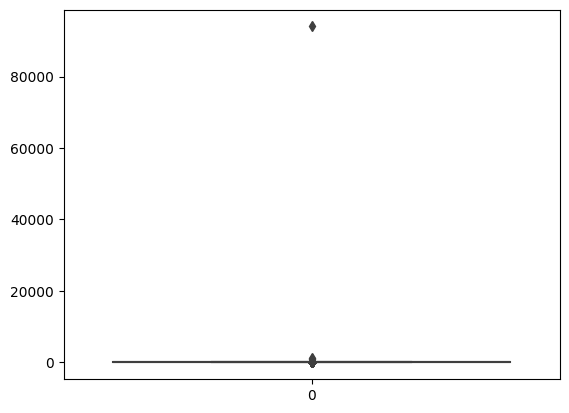

In [9]:
#Visualizing outliers using a box plot.
sns.boxplot(df['Engagement Rate'])

In [10]:
df[df['Engagement Rate'] >= 100.000000]

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
837,2023-03-10 12:37:06,General,FBPAGE,N/A,1,940,Photo,94000.000000
1586,2023-02-23 06:18:27,General,FBPAGE,N/A,1,1,Photo,100.000000
3216,2023-01-19 06:02:34,General,FBPAGE,N/A,5,44,Photo,880.000000
3457,2023-01-05 11:55:44,General,FBPAGE,N/A,300,3776,Photo,1258.666667


In [11]:
#There are also a significant amount of entries with '0' Engagement Rate
df[df['Engagement Rate'] == 0]

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.0
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.0
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.0
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.0
5,2023-03-31 19:42:11.331,CSGO,TWITTER,N/A,0,0,Photo,0.0
...,...,...,...,...,...,...,...,...
3473,2023-01-03 10:35:34.592,CSGO,TWITTER,N/A,0,0,Link,0.0
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,0.0
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,0.0
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,0.0


In [12]:
#Let's detect and deal with outliers using IQR method

Q1 = df['Engagement Rate'].quantile(0.25) #First quartile 
Q3 = df['Engagement Rate'].quantile(0.75) #Third Quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

In [13]:
#Values lesser than or greater than 1.5 times IQR would be treated as outliers
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

In [14]:
outliers = df[(df['Engagement Rate'] < lower_bound) | (df['Engagement Rate'] > upper_bound)]

df_no_outliers = df[(df['Engagement Rate'] >= lower_bound) & (df['Engagement Rate'] <= upper_bound)] #Creating a new df free from outliers

In [15]:
#Getting number of outliers
outlier_count = outliers.shape[0]
print("Number of outliers in 'Engagement Rate' column:", outlier_count)

Number of outliers in 'Engagement Rate' column: 295


In [16]:
outliers.describe()

,Total Impressions,Total Engagements,Engagement Rate
count,295.000000,295.000000,295.000000
mean,34381.335593,7741.603390,347.603722
std,49859.615663,8948.395815,5471.909239
min,1.000000,1.000000,12.539880
25%,12333.500000,2148.500000,15.088058
50%,30475.000000,5622.000000,18.843379
75%,42879.000000,9863.500000,25.544854
max,753227.000000,95062.000000,94000.000000


* **Finding Typical Engagement Rate.**

* To analyze the original dataset, we will utilize the median as our statistical measure for summarizing the central tendency. This approach helps mitigate the impact of outliers and provides a robust representation of the data's central value.

* For the filtered dataset, where outliers have been removed, we will employ the mean as our statistical measure. This decision allows us to calculate the average value of the data points accurately and capture the overall trend without the influence of extreme values.

In [17]:
typical_engagement_rate = df['Engagement Rate'].median()

In [18]:
typical_engagement_rate_mean = df_no_outliers['Engagement Rate'].mean()

In [19]:
typical_engagement_rate

2.041949413942011

In [20]:
typical_engagement_rate_mean

2.576703091651959

**Based on the observed results, the typical engagement rate is approximately 2.04.**

* In this analysis, we have considered the median as the measure of central tendency. We found that after using both the median and mean on the data filtered to remove outliers, there was no significant difference between the two measures.

* It is important to note that while dealing with outliers, it is essential to exercise caution. Some outliers may hold valuable information and insights for our analysis. Without further information about these outliers, it is not advisable to completely remove them. It is necessary to consider their potential significance before making any decisions regarding their exclusion from the dataset.

-> What’s the likelihood that we can
achieve a 15% engagement rate?

* We can calculate the proportion of engagement rates in the provided data that are equal to or greater than 15%, This will give us an estimate of the likelihood based on the available data.

In [21]:
#Let's find out how many wntries have engagement rate of more than or equal to 15%
df[df['Engagement Rate'] >= 15]

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399
11,2023-03-31 18:30:33.067,DOTA2,TWITTER,N/A,1013,153,Link,15.103653
21,2023-03-31 16:22:26.000,General,FBPAGE,Community Engagement,42328,8936,Photo,21.111321
61,2023-03-30 17:08:01.676,CSGO,TWITTER,Community Engagement,1416,231,Video,16.313559
...,...,...,...,...,...,...,...,...
3366,2023-01-11 10:00:59.000,General,FBPAGE,N/A,84782,14259,Photo,16.818428
3376,2023-01-10 14:31:11.944,DOTA2,TWITTER,N/A,22013,4465,Video,20.283469
3414,2023-01-10 09:01:02.000,General,FBPAGE,N/A,33609,5042,Video,15.001934
3433,2023-01-09 10:00:02.000,General,FBPAGE,N/A,107752,29860,Text,27.711783


In [22]:
counts_15 = df[df['Engagement Rate'] >= 15].shape[0]
counts_15

226

In [23]:
total_entries = df.shape[0]
total_entries

3479

In [24]:

likelihood_15_percent = (counts_15/total_entries) * 100
likelihood_15_percent

6.4961195745903995

**The typical Engagement Rate is 2.04 and the likelihood of achieving a 15% engagement rate is estimated to be 6.49%**

# *Task 2*
-> Does day of the week and time of posting affect engagement rates?

In [25]:
# Convert "Published Date" to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'])

# Extract day of the week and hour
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour of Day'] = df['Published Date'].dt.hour


In [26]:
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of Week,Hour of Day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday,19
...,...,...,...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,10
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,10
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,10
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text,1.984877,Tuesday,10


In [27]:
#Let's calculate average engagement rate
# First we will have to group by day of the week
median_engagement_by_day = df.groupby('Day of Week')['Engagement Rate'].median()
median_engagement_by_day

Day of Week
Friday       2.253066
Monday       1.914950
Saturday     1.409869
Sunday       1.741883
Thursday     2.312925
Tuesday      2.456992
Wednesday    1.717126
Name: Engagement Rate, dtype: float64

In [28]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the data by the defined order
median_engagement_by_day = median_engagement_by_day.reindex(order)
median_engagement_by_day

Day of Week
Monday       1.914950
Tuesday      2.456992
Wednesday    1.717126
Thursday     2.312925
Friday       2.253066
Saturday     1.409869
Sunday       1.741883
Name: Engagement Rate, dtype: float64

Based on our output, it appears that there is no significant difference in engagement rates between the days. The median engagement rates are fairly consistent throughout the week, indicating that the day of the week may not have a substantial impact on the overall engagement level.

Statistics of engagement rates with respect to different days

In [29]:
Weekdays_df = df[df['Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday'])]

In [30]:
Weekdays_df.describe()

,Total Impressions,Total Engagements,Engagement Rate,Hour of Day
count,2784.000000,2784.000000,2784.000000,2784.000000
mean,11283.522270,989.151580,38.847868,12.394397
std,31009.269521,3661.689032,1781.683125,3.362886
min,0.000000,0.000000,0.000000,0.000000
25%,177.000000,0.000000,0.000000,10.000000
50%,1843.000000,40.000000,2.151309,12.000000
75%,12439.000000,292.250000,5.131769,15.000000
max,753227.000000,95062.000000,94000.000000,23.000000


In [31]:
WeekdaysMT_df = df[df['Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]

In [32]:
WeekdaysMT_df.describe()

,Total Impressions,Total Engagements,Engagement Rate,Hour of Day
count,2076.000000,2076.000000,2076.000000,2076.000000
mean,11528.040944,1016.956647,5.388521,12.262042
std,33407.114766,3854.454167,34.325467,3.297567
min,0.000000,0.000000,0.000000,2.000000
25%,131.750000,0.000000,0.000000,10.000000
50%,1669.000000,36.500000,2.107825,12.000000
75%,11613.000000,274.000000,5.131769,15.000000
max,753227.000000,95062.000000,1258.666667,23.000000


In [33]:
Weekend_df = df[df['Day of Week'].isin(['Saturday', 'Sunday'])]

In [34]:
Weekend_df.describe()

,Total Impressions,Total Engagements,Engagement Rate,Hour of Day
count,695.000000,695.000000,695.000000,695.000000
mean,9726.388489,780.106475,3.733606,12.600000
std,22938.388478,2548.228235,6.112323,3.850746
min,0.000000,0.000000,0.000000,3.000000
25%,119.500000,0.000000,0.000000,10.000000
50%,2330.000000,35.000000,1.581191,13.000000
75%,12949.500000,236.000000,4.408094,15.000000
max,452337.000000,31855.000000,55.765629,23.000000


Let us also consider posts per day of the week

In [35]:
# Calculating the number of posts per day
num_posts_by_day = df.groupby('Day of Week').size()

# Calculating the total number of posts
total_posts = num_posts_by_day.sum()

In [36]:
# Creating an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Day', 'Median Engagement Rate', 'Number of Posts', 'Engagement Rate per Post'])

# Populating the DataFrame with the median engagement rate, number of posts, and engagement rate per post for each day
for day in order:
    median_engagement = median_engagement_by_day[day]
    num_posts = num_posts_by_day[day]
    engagement_rate_per_post = (median_engagement / num_posts) * 100

    results_df = pd.concat([results_df, pd.DataFrame({'Day': [day],
                                                      'Median Engagement Rate': [median_engagement],
                                                      'Number of Posts': [num_posts],
                                                      'Engagement Rate per Post': [engagement_rate_per_post]})],
                                                       ignore_index=True)

We calculated the engagement rate per post as the ratio of the median engagement to the number of posts, multiplied by 100. 

This measure provides an indication of how the frequency of posting may influence the overall engagement level.

In [37]:
results_df

,Day,Median Engagement Rate,Number of Posts,Engagement Rate per Post
0,Monday,1.914950,234,0.818355
1,Tuesday,2.456992,561,0.437966
2,Wednesday,1.717126,575,0.298631
3,Thursday,2.312925,706,0.327610
4,Friday,2.253066,708,0.318230
5,Saturday,1.409869,319,0.441965
6,Sunday,1.741883,376,0.463267


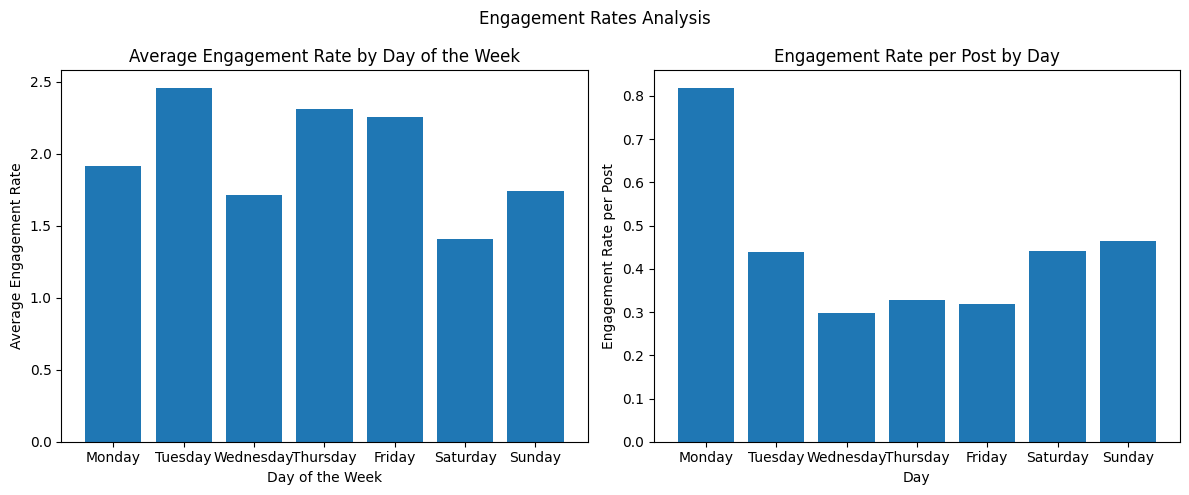

In [38]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Engagement Rates Analysis")

# Plot average engagement rate by day of the week
axs[0].bar(median_engagement_by_day.index, median_engagement_by_day)
axs[0].set_xlabel("Day of the Week")
axs[0].set_ylabel("Average Engagement Rate")
axs[0].set_title("Average Engagement Rate by Day of the Week")

# Plot engagement rate per post by day
axs[1].bar(results_df['Day'], results_df['Engagement Rate per Post'])
axs[1].set_xlabel("Day")
axs[1].set_ylabel("Engagement Rate per Post")
axs[1].set_title("Engagement Rate per Post by Day")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()



Based on our analysis, it appears that there is no significant difference in engagement rates between the days. However, when considering the number of posts on each day, there is a higher percentage of engagement on Mondays. Nonetheless, it is important to note that we cannot draw a definitive conclusion based on this observation alone.

To further investigate the potential influence of the day of the week and time of posting on engagement rates, we can formulate a hypothesis and perform an ANOVA test. This statistical test will help us determine if there is a significant difference in engagement rates among the different days of the week.

Let's formulate our hypothesis 

H0: The day of the week of posting has no significant effect on engagement rates.

H1 = The day of the week of posting has a significant effect on engagement rates.

In [39]:
# Grouping the data by day of the week
grouped_data = df.groupby('Day of Week')['Engagement Rate'].apply(list)

In [40]:
grouped_data

Day of Week
Friday       [0.0, 0.0, 0.0, 0.0, 12.76662813911947, 0.0, 4...
Monday       [1.006711409395973, 1.1484823625922889, 1.0130...
Saturday     [1.477832512315271, 0.7633587786259541, 0.2515...
Sunday       [1.7543859649122806, 6.6115702479338845, 0.0, ...
Thursday     [2.004008016032064, 0.9077155824508321, 16.313...
Tuesday      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2955381665543...
Wednesday    [10.843373493975903, 0.0, 3.6383708930328558, ...
Name: Engagement Rate, dtype: object

In [41]:
alpha = 0.05 #Setting significance value alpha = 0.05

# Performing the one-way ANOVA test
fvalue, pvalue = stats.f_oneway(*grouped_data)

# Printing the results
print("One-Way ANOVA Results:")
print("F-value:", fvalue)
print("p-value:", pvalue)


One-Way ANOVA Results:
F-value: 0.6447359314903734
p-value: 0.6944680279646221


In [42]:
if pvalue < alpha:
    print("The day of the week of posting have a significant effect on engagement rates.")
else:
    print("There is no significant effect of the day of the week of posting on engagement rates.")

There is no significant effect of the day of the week of posting on engagement rates.


We were unable to provide evidance against our null hypothesis.

Based on the obtained p-value greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, we conclude that there is no significant effect of the day of the week of posting on engagement rates.

In [43]:
# Grouping by hour of the day and calculating the median engagement rate
median_engagement_by_hour = df.groupby('Hour of Day')['Engagement Rate'].median()

# Calculating the number of posts per hour
num_posts_by_hour = df.groupby('Hour of Day').size()

# Creating a DataFrame to store the results
Hour_df = pd.DataFrame(columns=['Hour of Day', 'Median Engagement Rate', 'Number of Posts', 'Engagement Rate per Post'])

# Populating the DataFrame with the median engagement rate, number of posts, and engagement rate per post for each hour
for hour in median_engagement_by_hour.index:
    median_engagement = median_engagement_by_hour[hour]
    num_posts = num_posts_by_hour[hour]
    engagement_rate_per_post = (median_engagement / num_posts) * 100
    new_row = pd.DataFrame({'Hour of Day': [hour],
                            'Median Engagement Rate': [median_engagement],
                            'Number of Posts': [num_posts],
                            'Engagement Rate per Post': [engagement_rate_per_post]})
    Hour_df = pd.concat([Hour_df, new_row], ignore_index=True)

Hour_df


,Hour of Day,Median Engagement Rate,Number of Posts,Engagement Rate per Post
0,0,0.000000,1,0.000000
1,2,0.840156,1,84.015577
2,3,4.093361,6,68.222691
3,4,2.204121,9,24.490231
4,5,3.571429,31,11.520737
5,6,2.893540,78,3.709666
6,7,3.327189,128,2.599366
7,8,3.237761,172,1.882419
8,9,2.016244,384,0.525064
9,10,2.173913,265,0.820345


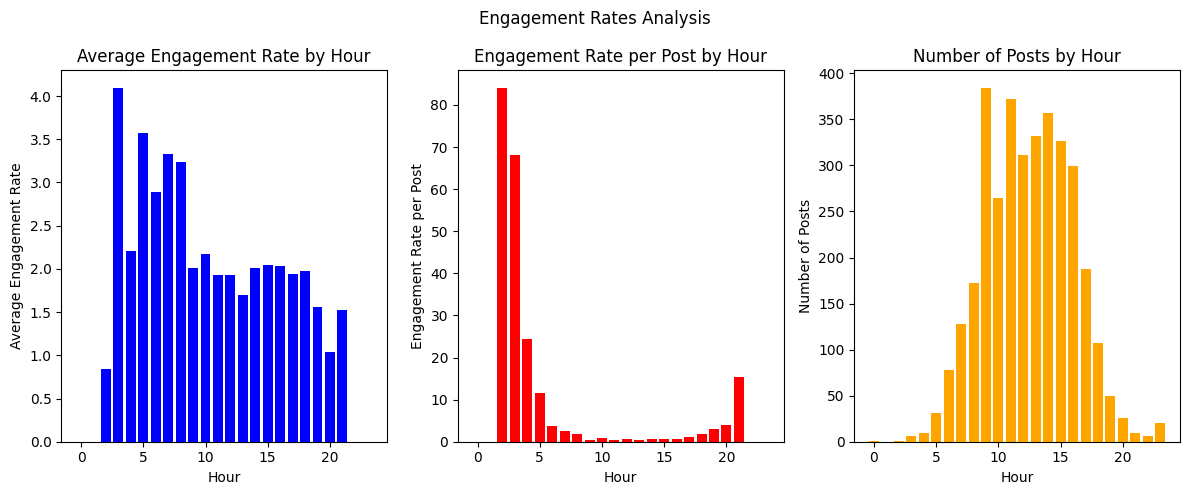

In [72]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Engagement Rates Analysis")

# Define colors for the bars
colors = ['blue', 'red', 'orange']

# Plot average engagement rate by hour
axs[0].bar(median_engagement_by_hour.index, median_engagement_by_hour, color=colors[0])
axs[0].set_xlabel("Hour")
axs[0].set_ylabel("Average Engagement Rate")
axs[0].set_title("Average Engagement Rate by Hour")

# Plot engagement rate per post by hour
axs[1].bar(Hour_df['Hour of Day'], Hour_df['Engagement Rate per Post'], color=colors[1])
axs[1].set_xlabel("Hour")
axs[1].set_ylabel("Engagement Rate per Post")
axs[1].set_title("Engagement Rate per Post by Hour")

# Plot number of posts by hour
axs[2].bar(Hour_df['Hour of Day'], Hour_df['Number of Posts'], color=colors[2])
axs[2].set_xlabel("Hour")
axs[2].set_ylabel("Number of Posts")
axs[2].set_title("Number of Posts by Hour")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


Looking at the engagement rate per post, we can see that there is significant variation throughout the day. Some hours, such as 2 AM, 3 AM, and 4 AM, have relatively high engagement rates per post, while other hours, such as 9 AM and 10 AM, have lower engagement rates per post.

Therefore, we can conclude that the hour of the day does have an impact on the engagement rate. 

To further confirm our analysis let's preform a statistical test.

We will perform one-way ANOVA test to determine if there is a significant difference in the engagement rate among different hours of the day

In [45]:
import scipy.stats as stats

# Grouping the engagement rate by hour of the day
grouped_data = [df[df['Hour of Day'] == hour]['Engagement Rate'] for hour in range(24)]

# Performing one-way ANOVA test
fvalue, pvalue = stats.f_oneway(*grouped_data)
print('pvalue: ', pvalue)

pvalue:  nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Getting a NaN value for the p-value, it might indicate that there is not enough data or variability in the engagement rates for each hour of the day to perform the ANOVA test reliably.

We can conclude that the hour of the day does have an impact on the engagement rate. 

Median Engagement Rate: hours 3, 5, 6, and 7 have relatively higher median engagement rates compared to other hours.

Number of Posts:Higher engagement rates with a sufficient number of posts indicate a higher likelihood of reaching a larger audience. For example, hours 8, 9, 10, 11, 12, and 13 have a reasonable number of posts along with relatively good median engagement rates.

Engagement This metric considers the frequency of posts during a specific hour and can provide insights into the effectiveness of individual posts. For example, hours 2, 3, 4, and 19 have higher engagement rates per post.

Based on these considerations, hours 3, 5, 6, 7, 8, 9, 10, 11, 12, and 13 appear to be promising for achieving higher engagement rates

In [46]:
# Create a pivot table with average engagement rates
pivot_table = df.pivot_table(index='Hour of Day', columns='Day of Week', values='Engagement Rate', aggfunc='median')

# Reorder the columns to match the order of days in a week
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']]
pivot_table

Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour of Day,,,,,,,
0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,NaN,0.840156,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.589022,1.876554,7.922146,4.597701,NaN
4,NaN,NaN,0.928009,2.197654,11.975419,2.388278,NaN
5,NaN,56.480028,3.336486,2.827854,3.344209,1.203913,NaN
6,2.857143,2.929936,1.475761,3.177005,3.467562,3.630166,2.487554
7,5.603050,4.807692,2.587745,3.034573,3.547175,1.687216,3.709791
8,2.516508,1.973260,1.521379,5.490370,5.215420,7.867241,0.000000
9,1.094092,4.049255,0.375235,3.289474,2.832434,3.313005,4.566596


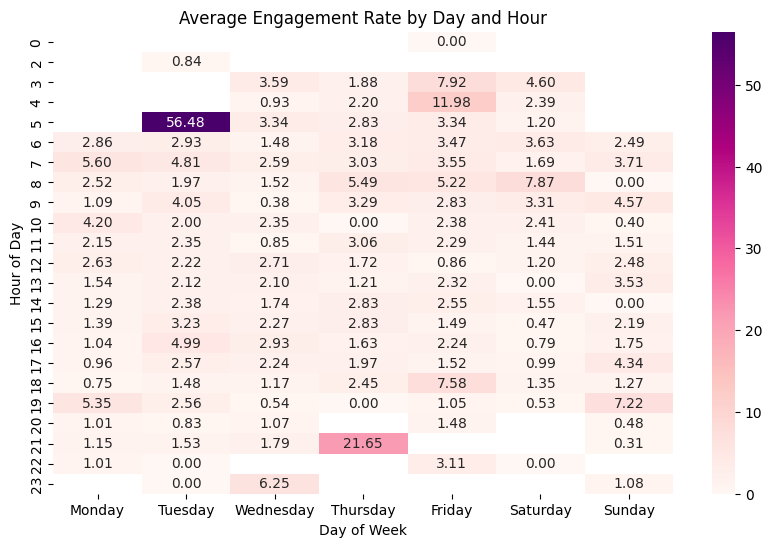

In [47]:
# Create a heatmap with annotated values
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='RdPu', annot=True, fmt='.2f', cbar=True)

# Set the axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Average Engagement Rate by Day and Hour')

# Show the plot
plt.show()


# Task 3

How are our game titles doing in terms of social performance? Is there a specific game
we should focus more on or less?

In [48]:
#There is a presence of *Space* in 'General' that has created 2 differents values
game_groups = df.groupby('Account')
unique_games = game_groups['Account'].unique()
print(unique_games)

Account
CSGO                            [CSGO]
Content Creators    [Content Creators]
DOTA2                          [DOTA2]
General                      [General]
General                     [General ]
Valorant                    [Valorant]
Name: Account, dtype: object


In [49]:
#Stripping extra space in 'General'
df['Account'] = df['Account'].str.strip()

# Count the occurrences of each game
game_counts = df['Account'].value_counts()

# Display the updated value counts
print(game_counts)

General             2293
DOTA2                803
CSGO                 270
Valorant              60
Content Creators      53
Name: Account, dtype: int64


Let's see how game titles are influencing engagement rate

In [50]:
#Let's group the data according to different games and getbtheir counts
total_posts_by_game = df.groupby('Account')['Engagement Rate'].count()
total_posts_by_game

Account
CSGO                 270
Content Creators      53
DOTA2                803
General             2293
Valorant              60
Name: Engagement Rate, dtype: int64

In [51]:
# Calculate average engagement rate per game title, considering median as our aggregate function
median_engagement_by_game = df.groupby('Account')['Engagement Rate'].median()


Median_Results = pd.DataFrame({'Median Engagement Rate': median_engagement_by_game, 'Total Posts': total_posts_by_game})

In [52]:
#Get engagement percent wrt no. of posts
Median_Results['Engagement Percentage'] = (Median_Results['Median Engagement Rate'] / Median_Results['Total Posts']) * 100
Median_Results.sort_values(by='Engagement Percentage', ascending=False, inplace=True)

In [53]:
Median_Results

,Median Engagement Rate,Total Posts,Engagement Percentage
Account,,,
Content Creators,2.478134,53,4.675725
Valorant,2.092041,60,3.486735
CSGO,1.759788,270,0.651773
DOTA2,3.540813,803,0.440948
General,1.639344,2293,0.071493


Content Creators and Valorant have relatively higher median engagement rates and engagement percentages compared to the other game titles. 

Evil Geniuses' content creators are doing an amazing job, as people seem to love them, whether it's through live streaming or other forms of audience engagement. It would be beneficial to focus more on posts and content related to the content creators.

Valorant and CSGO are both almost similar games, but it appears that the audience's interest is leaning more towards Valorant. Evil Geniuses should prioritize their Valorant accounts and posts, giving them more attention and resources. 

(Also we need to win the VCT title!!!!) 



CSGO and DOTA2 have lower median engagement rates and engagement percentages compared to Content Creators and Valorant.
There are a lot of Dota 2 posts, but user engagements wrt posts are low! These might require more attention or strategies to improve their social performance.



General has the lowest median engagement rate and engagement percentage among all the game titles. 


# Task 4
-> What media type performs the best?

In [54]:
df['Media Type'].value_counts()

Photo       1490
Video        967
Text         910
Link          94
Carousel       9
Mixed          5
Album          4
Name: Media Type, dtype: int64

In [55]:
#Group the data based on media types and calculate median across each type
media_type_engagement = df.groupby('Media Type')['Engagement Rate'].median().sort_values(ascending=False)

print(media_type_engagement)

Media Type
Mixed       7.247822
Video       3.190552
Carousel    3.032566
Photo       1.976015
Text        1.122761
Album       0.000000
Link        0.000000
Name: Engagement Rate, dtype: float64


In [56]:
# Let's consider engagement wtr no of posts as well
#Calculate the total number of posts for each media type
total_posts_by_media_type = df.groupby('Media Type')['Engagement Rate'].count().sort_values(ascending=False)

In [57]:
# Calculate the engagement rate percentagwrt no of posts
engagement_rate_percentage = (media_type_engagement / total_posts_by_media_type) * 100

# Create a DataFrame to display the results
media_df = pd.DataFrame({'Median Engagement Rate': media_type_engagement,
                        'Total Posts': total_posts_by_media_type,
                        'Engagement Rate Percentage': engagement_rate_percentage})
media_df.sort_values(by = 'Engagement Rate Percentage', ascending = False, inplace = True)

In [58]:
media_df

,Median Engagement Rate,Total Posts,Engagement Rate Percentage
Media Type,,,
Mixed,7.247822,5,144.956444
Carousel,3.032566,9,33.695174
Video,3.190552,967,0.329943
Photo,1.976015,1490,0.132618
Text,1.122761,910,0.123380
Album,0.000000,4,0.000000
Link,0.000000,94,0.000000


The media type that performs the best in terms of median engagement rate and engagement rate percentage is "Mixed." It has a median engagement rate of 7.247822 and an engagement rate percentage of 144.956444. 

Considering the amount of video uploads and the engagement rate, video also performs well!

Photos have the highest number (posts) that's the reason median engagement rate here comes to be a bit lower

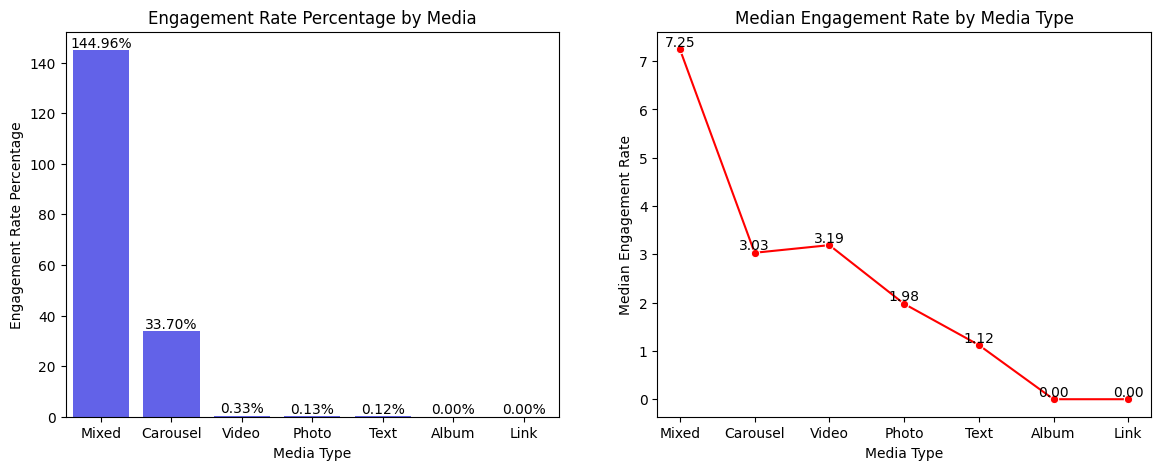

In [59]:
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Engagement Rate Percentage by Campaign
sns.barplot(x=media_df.index, y='Engagement Rate Percentage', data=media_df, ax=axs[0], color='blue', alpha=0.7)
axs[0].set_xlabel('Media Type')
axs[0].set_ylabel('Engagement Rate Percentage')
axs[0].set_title('Engagement Rate Percentage by Media')

# Add data labels
for i, val in enumerate(media_df['Engagement Rate Percentage']):
    axs[0].text(i, val, f'{val:.2f}%', ha='center', va='bottom')

# Plot for Engagement Rate Percentage by Media Type
sns.lineplot(x=media_df.index, y='Median Engagement Rate', data=media_df, marker='o', color='red', ax=axs[1])
axs[1].set_xlabel('Media Type')
axs[1].set_ylabel('Median Engagement Rate')
axs[1].set_title('Median Engagement Rate by Media Type')

# Add annotations for median values
for i, val in enumerate(media_df['Median Engagement Rate']):
    axs[1].annotate(f'{val:.2f}', (media_df.index[i], val), ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Display the plot
plt.show()


The media type that performs the best in terms of median engagement rate and engagement rate percentage is "Mixed." It has a median engagement rate of 7.247822 and an engagement rate percentage of 144.956444.

Carousel and video perform better than remaining

# Task 5
What is our best performing campaign?

In [60]:
#Group the data based on campaigns and calculate median across each type
campaign_engagement = df.groupby('Campaign Name')['Engagement Rate'].median().sort_values(ascending=False)
campaign_engagement

Campaign Name
Evergreen                3.090909
Community Engagement     2.882206
Evil Exhibited           2.064265
N/A                      0.000000
Name: Engagement Rate, dtype: float64

In [61]:
# Let's consider engagement wtr no of posts as well
#Calculate the total number of posts for each campaign
Total_campaigns = df.groupby('Campaign Name')['Engagement Rate'].count().sort_values(ascending=False)

# Calculate the engagement rate percentage
engagement_rate_percentage = (campaign_engagement / Total_campaigns) * 100

In [62]:
# Create a DataFrame to display the results
campaign_df = pd.DataFrame({'Median Engagement Rate': campaign_engagement,
                        'Total campaigns': Total_campaigns,
                        'Engagement Rate Percentage': engagement_rate_percentage})

# Sort the DataFrame by the median engagement rate in descending order
campaign_df = campaign_df.sort_values(by='Engagement Rate Percentage', ascending=False)

In [63]:
campaign_df

,Median Engagement Rate,Total campaigns,Engagement Rate Percentage
Campaign Name,,,
Evergreen,3.090909,163,1.896263
Evil Exhibited,2.064265,420,0.491492
Community Engagement,2.882206,1411,0.204267
N/A,0.000000,1485,0.000000


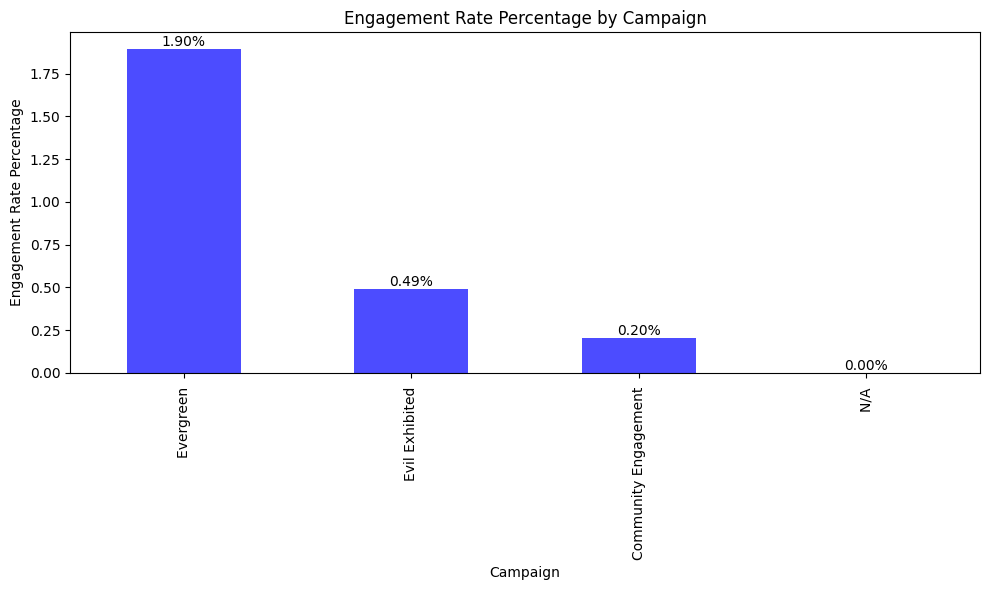

In [64]:

# Plotting the results
plt.figure(figsize=(10, 6))
ax = campaign_df['Engagement Rate Percentage'].plot(kind='bar', color='blue', alpha=0.7)

# Adding data labels
for i, val in enumerate(campaign_df['Engagement Rate Percentage']):
    ax.text(i, val, f'{val:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Campaign')
plt.ylabel('Engagement Rate Percentage')
plt.title('Engagement Rate Percentage by Campaign')

# Displaying the plot
plt.tight_layout()
plt.show()



Based on the above analysis we can concluse that, Evergreen as the best performing campaign in terms of Engagement rate as well as considering no of campaigns

# Task 6

Define out a posting strategy for our social channels based on your discoveries.

**Day-wise Strategy:**

Tuesday and Thursday show higher median engagement rates compared to other days. Consider these days for important or high-quality content 

Saturday and Sunday also have decent engagement rates. Utilize these days to maintain consistent engagement with your audience.

Wednesday and Monday have relatively lower engagement rates. Focus on lighter or engaging content to boost interaction on these days.


**Hour-wise Strategy:**

The hours of 2 AM, 5 AM, 6 AM, 7 AM, and 8 AM show higher median engagement rates. Schedule posts during these hours to capture the attention of early risers and those starting their day.
The hours of 6 PM to 9 PM have moderate engagement rates. Leverage this time slot for reaching out to your audience during their leisure hours or after work.
Avoid posting during late-night hours (10 PM onwards) as the engagement rates drop significantly.


**Game-specific Strategy:**

Valorant and Content Creators have higher median engagement rates compared to CSGO, DOTA2, and General. Allocate more resources and focus on creating content related to Valorant and Content Creators to cater to the preferences of your audience.


**Media Type Strategy:**

Mixed content and carousel posts generate higher engagement rates compared to other media types. Emphasize creating content in these formats to capture audience attention.
Videos also have a decent engagement rate and should be incorporated regularly in your content strategy.
Text-based posts, albums, and links show relatively lower engagement rates. Limit the frequency of these media types or find ways to make them more visually appealing or engaging.


**Campaign Strategy:**

The "Evergreen" campaign yields the highest median engagement rate among the listed campaigns. Allocate resources to maintain and enhance this campaign to continue its success.
"Evil Exhibited" and "Community Engagement" campaigns also show decent engagement rates. Continue to invest in these campaigns while monitoring their performance and making necessary adjustments.


In [65]:
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of Week,Hour of Day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,19
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday,19
...,...,...,...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,10
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,10
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,10
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text,1.984877,Tuesday,10


# Task 7
What suggestions would you give to the social media team if they want to expand their
presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

In [66]:
#Create a dataframe by grouping Account(Game), Account Type, Engagement Rate and Number of Posts/Activities
social_media_median_engagement_rate = df.groupby(['Account', 'Account Type'])['Engagement Rate'].median().reset_index()

In [67]:
# Sort the DataFrame by 'Account' and 'Engagement Rate' in descending order
social_media_median_engagement_rate.sort_values(['Account', 'Engagement Rate'], ascending=[True, False], inplace=True)

In [68]:
count_of_posts = df.groupby(['Account', 'Account Type']).size().reset_index(name='Number of Posts')

#Merge no of posts to Account and Engagement
social_media_median_engagement_rate['Number of Posts'] = social_media_median_engagement_rate.merge(count_of_posts, on=['Account', 'Account Type'], how='left')['Number of Posts']

In [69]:
social_media_median_engagement_rate

,Account,Account Type,Engagement Rate,Number of Posts
0,CSGO,TWITTER,1.759788,270
1,Content Creators,YOUTUBE,2.478134,53
2,DOTA2,TWITTER,3.540813,795
3,DOTA2,YOUTUBE,2.651696,8
4,General,FBPAGE,8.586312,585
7,General,TIKTOK_BUSINESS,4.487179,22
9,General,YOUTUBE,2.681292,588
6,General,LINKEDIN_COMPANY,1.689915,99
8,General,TWITTER,1.682220,886
5,General,INSTAGRAM,0.000000,113


Encourage Content Creators: As seen through earlier analysis, content creators are gaining a good engagement rate on YouTube, However it can be seen here they are less active, it would be beneficial to encourage content creators to create more content and on other social media platforms as well. This can help diversify the team's reach and attract a wider audience.

Expand Presence for Valorant: Valorant has shown a good engagement rate, particularly on YouTube. To capitalize on this success, the social media team should consider creating more content such as posts, videos, and carousels not only on YouTube but also on other platforms. This can help expand the reach and visibility of Valorant content, attracting more viewers and engagement.

Increase Reach for CSGO and Dota 2: Similar to Valorant, CSGO and Dota 2 have shown potential in terms of engagement rate. The social media team should focus on increasing the spread of social media reach for these games as well. This can be achieved by creating engaging content, exploring different media types (e.g., photos, videos, links), and leveraging multiple social media platforms to target a wider audience.

Diversify Platforms: To further expand their presence, the social media team should consider diversifying their presence across different platforms. For example, if the CSGO YouTube channel is performing well, they can explore expanding to TikTok to tap into a different audience base and engage with them using short-form videos. It's important to assess the suitability of each platform based on the target audience, content format, and overall strategy.

Analyze and Adapt: Continuously analyze the performance of different social media platforms and content types to identify trends and adapt the social media strategy accordingly. Keep track of engagement rates, audience demographics, and content preferences to refine the approach and maximize impact.